In [1]:
import sys
import torch
from torch import nn
import torch.nn.functional as F
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification

sys.path.insert(1, 'C:\\Users\\shrey\\Desktop\\NUS- Everything\\Semester 7\\CG4002\\CG4002_B18\\sw1_ml\\src\\data\\')
sys.path.insert(2, 'C:\\Users\\shrey\\Desktop\\NUS- Everything\\Semester 7\\CG4002\\CG4002_B18\\sw1_ml\\src\\model\\')
sys.path.insert(3, 'C:\\Users\\shrey\\Desktop\\NUS- Everything\\Semester 7\\CG4002\\CG4002_B18\\sw1_ml\\src\\feature_extraction\\')

from load_nn_data import load_neural_network_data
from load_data import load_dance_data, load_position_data, load_position_data_w11
from load_data import one_hot_encoder
from combine_data import combine_dance_data, pre_process_dance_data, combine_all_dancer_data, pre_process_position_data, combine_all_position_data
from neural_network_model import neural_network_model_fpga

Run below when new data is added

In [4]:
# dataset = 'C:\\Users\\shrey\\Desktop\\NUS- Everything\\Semester 7\\CG4002\\CG4002_B18\\DataSets\\dance13_test\\'
dataset = 'C:\\Users\\shrey\\Desktop\\NUS- Everything\\Semester 7\\CG4002\\CG4002_B18\\DataSets\\dance13_test1\\'
combine_dance_data(dataset)
pre_process_dance_data(dataset)

Files read from  wy_err_13


In [5]:
dataset = 'C:\\Users\\shrey\\Desktop\\NUS- Everything\\Semester 7\\CG4002\\CG4002_B18\\DataSets\\'
combine_all_dancer_data(dataset, 'dance13_test1', 'combined13_test')

In [6]:
# dataset = 'C:\\Users\\shrey\\Desktop\\NUS- Everything\\Semester 7\\CG4002\\CG4002_B18\\DataSets\\combined13_test\\'
dataset = 'C:\\Users\\shrey\\Desktop\\NUS- Everything\\Semester 7\\CG4002\\CG4002_B18\\DataSets\\combined13\\'

sampling_rate = 5
window_size = 2.56

X, y = load_dance_data(dataset, sampling_rate, window_size)

Files read from elbow.txt
Files read from hair.txt
Files read from logout.txt
Files read from pushback.txt
Files read from rocket.txt
Files read from scarecrow.txt
Files read from shoulder.txt
Files read from window.txt
Files read from zigzag.txt


In [7]:
X, y = shuffle(X, y)
X_train, X_test = X[:int(len(X)*0.8), :], X[int(len(X)*0.8):, :]
y_train, y_test = y[:int(len(X)*0.8), :], y[int(len(X)*0.8):, :]

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
y_train = y_train.reshape(y_train.shape[0]).long()

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()
y_test = y_test.reshape(y_test.shape[0]).long()

in_size = X.shape[1]
out_size = one_hot_encoder(y).shape[1]

In [8]:
X.shape

(779, 86)

In [9]:
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

ExtraTreesClassifier(random_state=0)

In [10]:
inputs, labels = X_test, y_test
ExtraTreesClassifier(random_state=0)
res = clf.predict(inputs)
cor = 0
total = len(res)
for i in range(total):
    if res[i] == labels[i]:
        cor += 1
print('Accuracy- ', cor/total)

Accuracy-  1.0


In [11]:
dataset = 'C:\\Users\\shrey\\Desktop\\NUS- Everything\\Semester 7\\CG4002\\CG4002_B18\\DataSets\\combined13_test\\'
# dataset = 'C:\\Users\\shrey\\Desktop\\NUS- Everything\\Semester 7\\CG4002\\CG4002_B18\\DataSets\\combined13\\'

sampling_rate = 5
window_size = 2.56

X_test_new, y_test_new = load_dance_data(dataset, sampling_rate, window_size)

Files read from elbow.txt
Files read from hair.txt
Files read from logout.txt
Files read from pushback.txt
Files read from rocket.txt
Files read from scarecrow.txt
Files read from shoulder.txt
Files read from window.txt
Files read from zigzag.txt


In [12]:
inputs, labels = X_test_new, y_test_new
ExtraTreesClassifier(random_state=0)
res = clf.predict(inputs)
cor = 0
total = len(res)
for i in range(total):
    if res[i] == labels[i]:
        cor += 1
print('Accuracy- ', cor/total)

Accuracy-  0.8464328899637243


In [13]:
import pickle
with open('clf_ensemble_Shre_v2.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [18]:
clf_frequency_ensemble = pickle.load(open('clf_ensemble_Shre_v2.pkl', 'rb'))

clf_frequency_ensemble.n_jobs = 1
# p = clf_frequency_ensemble.predict(X_test)
val = X_test.numpy()
print(val.shape)
# val.append(X_test[0])
p = clf_frequency_ensemble.predict([val[20]])
print(p)
# print(y_test)

(156, 86)
[8]


In [42]:
nb_classes = 9

confusion_matrix = np.zeros((nb_classes, nb_classes))
correct = total = 0

with torch.no_grad():
    for inputs, labels in testloader:
        outputs = nn_model(inputs)
        
        # print('Input-')
        # print(inputs[0].numpy())
        # print('Output-')
        # print(labels[0].numpy())
        
        _, predicted = torch.max(outputs, 1)
        # print('Predicted-')
        # print(predicted[0].numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        for t, p in zip(labels.view(-1), predicted.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1

#confusion_matrix = np.delete(confusion_matrix, 0, 0)
#confusion_matrix = np.delete(confusion_matrix, 0, 1)


In [43]:
print('Accuracy of the network on the test inputs: %d %%' % (
    100 * correct / total))
print('Confusion Matrix of Neural Network- ')
print(confusion_matrix)

Accuracy of the network on the test inputs: 58 %
Confusion Matrix of Neural Network- 
[[16.  0.  3.  1.  0.  1.  2.  1.  0.]
 [ 0. 14.  0.  0.  0.  0.  4.  0.  0.]
 [ 2.  0.  7.  5.  0.  2.  0.  0.  0.]
 [ 0.  3.  1. 10.  1.  1.  3.  0.  0.]
 [ 0.  0.  1.  5.  1.  2.  0.  0.  0.]
 [ 1.  2.  3.  2.  0.  6.  1.  2.  0.]
 [ 0.  0.  0.  0.  0.  0. 18.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  1. 16.  0.]
 [ 0.  1.  0.  1.  0.  0. 11.  0.  4.]]


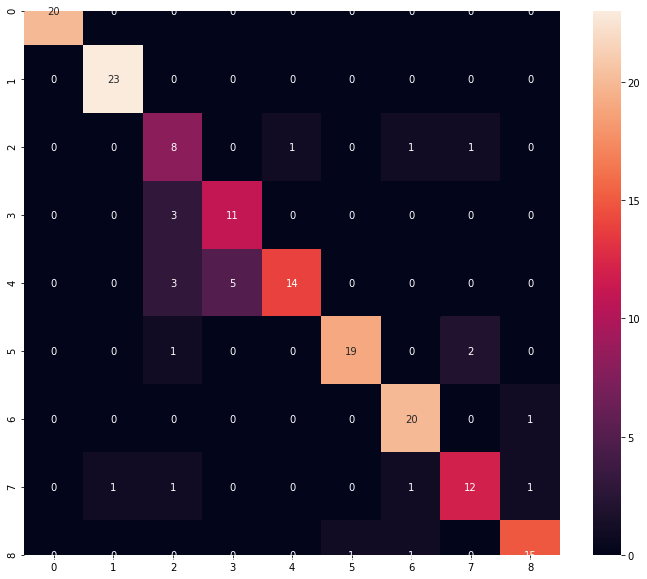

In [34]:
plt.figure(figsize = (12, 10))
sn.heatmap(confusion_matrix, annot=True)

In [39]:
trainloader, testloader = load_neural_network_data(X_train, y_train, X_test, y_test)

In [29]:
nn_model = neural_network_model_fpga(input_size=in_size, hidden_states= [256,128], output_size=out_size)
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(nn_model.parameters(), lr=0.001)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [31]:
def score_function(engine):
    val_loss = engine.state.metrics['crossentropy']
    accuracy = engine.state.metrics['accuracy']
    return accuracy

trainer = create_supervised_trainer(nn_model, optimizer, loss)
evaluator = create_supervised_evaluator(nn_model,
                                        metrics={
                                            'accuracy': Accuracy(),
                                            'crossentropy': Loss(loss)
                                            })

handler = EarlyStopping(patience=5, score_function=score_function, trainer=trainer)
# Note: the handler is attached to an *Evaluator* (runs one epoch on validation dataset).
evaluator.add_event_handler(Events.COMPLETED, handler)

@trainer.on(Events.EPOCH_COMPLETED)
def log_training_results(trainer):
    evaluator.run(trainloader)
    metrics = evaluator.state.metrics
    print("Training Results - Epoch: {}  Avg accuracy: {:.2f} Avg loss: {:.2f}"
          .format(trainer.state.epoch, metrics['accuracy'], metrics['crossentropy']))

@trainer.on(Events.EPOCH_COMPLETED)
def log_validation_results(trainer):
    evaluator.run(testloader)
    metrics = evaluator.state.metrics
    print("Validation Results - Epoch: {}  Avg accuracy: {:.2f} Avg loss: {:.2f}"
          .format(trainer.state.epoch, metrics['accuracy'], metrics['crossentropy']))

trainer.run(trainloader, max_epochs=35)

Training Results - Epoch: 1  Avg accuracy: 0.45 Avg loss: 1.67
Validation Results - Epoch: 1  Avg accuracy: 0.43 Avg loss: 1.72
Training Results - Epoch: 2  Avg accuracy: 0.49 Avg loss: 1.38
Validation Results - Epoch: 2  Avg accuracy: 0.48 Avg loss: 1.47
Training Results - Epoch: 3  Avg accuracy: 0.61 Avg loss: 1.06
Validation Results - Epoch: 3  Avg accuracy: 0.60 Avg loss: 1.18
Training Results - Epoch: 4  Avg accuracy: 0.69 Avg loss: 0.92
Validation Results - Epoch: 4  Avg accuracy: 0.62 Avg loss: 1.10
Training Results - Epoch: 5  Avg accuracy: 0.67 Avg loss: 0.91
Validation Results - Epoch: 5  Avg accuracy: 0.63 Avg loss: 1.16
Training Results - Epoch: 6  Avg accuracy: 0.72 Avg loss: 0.84
Validation Results - Epoch: 6  Avg accuracy: 0.68 Avg loss: 0.98
Training Results - Epoch: 7  Avg accuracy: 0.81 Avg loss: 0.63
Validation Results - Epoch: 7  Avg accuracy: 0.72 Avg loss: 0.86
Training Results - Epoch: 8  Avg accuracy: 0.84 Avg loss: 0.59
Validation Results - Epoch: 8  Avg accura

State:
	iteration: 357
	epoch: 17
	epoch_length: 21
	max_epochs: 35
	output: 0.3790728747844696
	batch: <class 'list'>
	metrics: <class 'dict'>
	dataloader: <class 'torch.utils.data.dataloader.DataLoader'>
	seed: <class 'NoneType'>
	times: <class 'dict'>

In [35]:
torch.save(nn_model.state_dict(), "NN_9moves_WY_85.pt")

In [8]:
nn_model = neural_network_model_fpga(input_size=in_size, hidden_states= [256,128], output_size=out_size)
nn_model.load_state_dict(torch.load("NN_3moves_3posnew_90_best.pt"))
nn_model.eval()

Sequential(
  (0): QuantStub()
  (1): Linear(in_features=86, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): ReLU()
  (5): Linear(in_features=128, out_features=6, bias=True)
  (6): LogSoftmax()
  (7): DeQuantStub()
)

In [20]:
torch.set_printoptions(edgeitems=10000) 
np.set_printoptions(edgeitems=10000)

## ML Model for position detection

Run below when new data is added

In [18]:
torch.save(position_model.state_dict(), "Position_Shre.pt")